O governo do canadá pediu a ajuda para nossa consultoria Sirius contruir uma IA que consiga fazer a predição da emissão de CO2 na atmosfera considerando algumas características dos carros. Portanto, com a construção dessa IA o governo conseguirá focar em questões relacionadas a melhoria da qualidade do ar.
Para a resolução deste exercício você precisará responder várias questões.



Aqui uma breve descrição de todas as variáveis disponíveis no dataset:

**Variáveis**
Tota de variáveis: 12

Lingua: Inglês

`Make:`	        Empresa que fez o veículo

`Model:`	        Modelo do carro. (4WD/4X4 = Tração nas quatro rodas, AWD = Tração nas quatro rodas, FFV = Veículo de combustível flexível, SWB = Distância entre eixos curta, LWB = Distância entre eixos longa, EWB = Distância entre eixos estendida)

`Vehicle Class: `  Classe do veiculo, dependendo da utilidade, capacidade e peso

`Engine Size(L):`  Tamanho do motor usado em litros.

`Cylinders:`      Número de cilindros

`Transmission:`   Tipo de transmissão com número de engrenagens. (A = Automático, AM = Manual automatizado, AS = Automático com mudança de seleção, AV = Variável continuamente, M = Manual e valores de 3 - 10 = Número das engrenagens.)

`Fuel Type:`           Tipo de combustível usado. (X = Gasolina normal, Z = Gasolina premium, D = Diesel, E = Etanol (E85), N = Gás natural)

`Fuel Consumption City (L/100 km):`           Consumo de combustível nas estradas da cidade (L / 100 km)

`Fuel Consumption Hwy (L/100 km):`            Consumo de combustível em rodovias (L / 100 km)

`Fuel Consumption Comb (L/100 km):`         O consumo de combustível combinado (55% cidade, 45% rodovia) é mostrado em L / 100 km

`Fuel Consumption Comb (mpg):`       O consumo de combustível combinado na cidade e na rodovia é mostrado em milhas por galão (mpg)

`CO2 Emissions(g/km): `    As emissões de dióxido de carbono do tubo de escape (em gramas por quilômetro) para condução combinada em cidade e rodovia


Ao longo desse exercícios vamos tentar responder a perguntas como:

1. Quais variáveis mais impactam na emissão de CO2?
2. Considerando os principais algoritmos de regressão, quais apresentam melhor resultado das métricas R2 e MSE?
3. O que você poderia fazer para melhorar os valores das métricas do melhor algoritmo?

In [1]:
#Questão 1
#Faça as importações necessárias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Questão 2
#carregue os dados do arquivo csv
df_original = pd.read_csv('CO2 Emissions_Canada.csv')
df_original.head(2)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221


In [3]:
#Questão 3
#verifique as informações (info) do dataset e o seu formato (shape) e a sua descrição
df = df_original.copy()

In [4]:
print(df.shape)
print(df.info())

(7385, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  


In [5]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


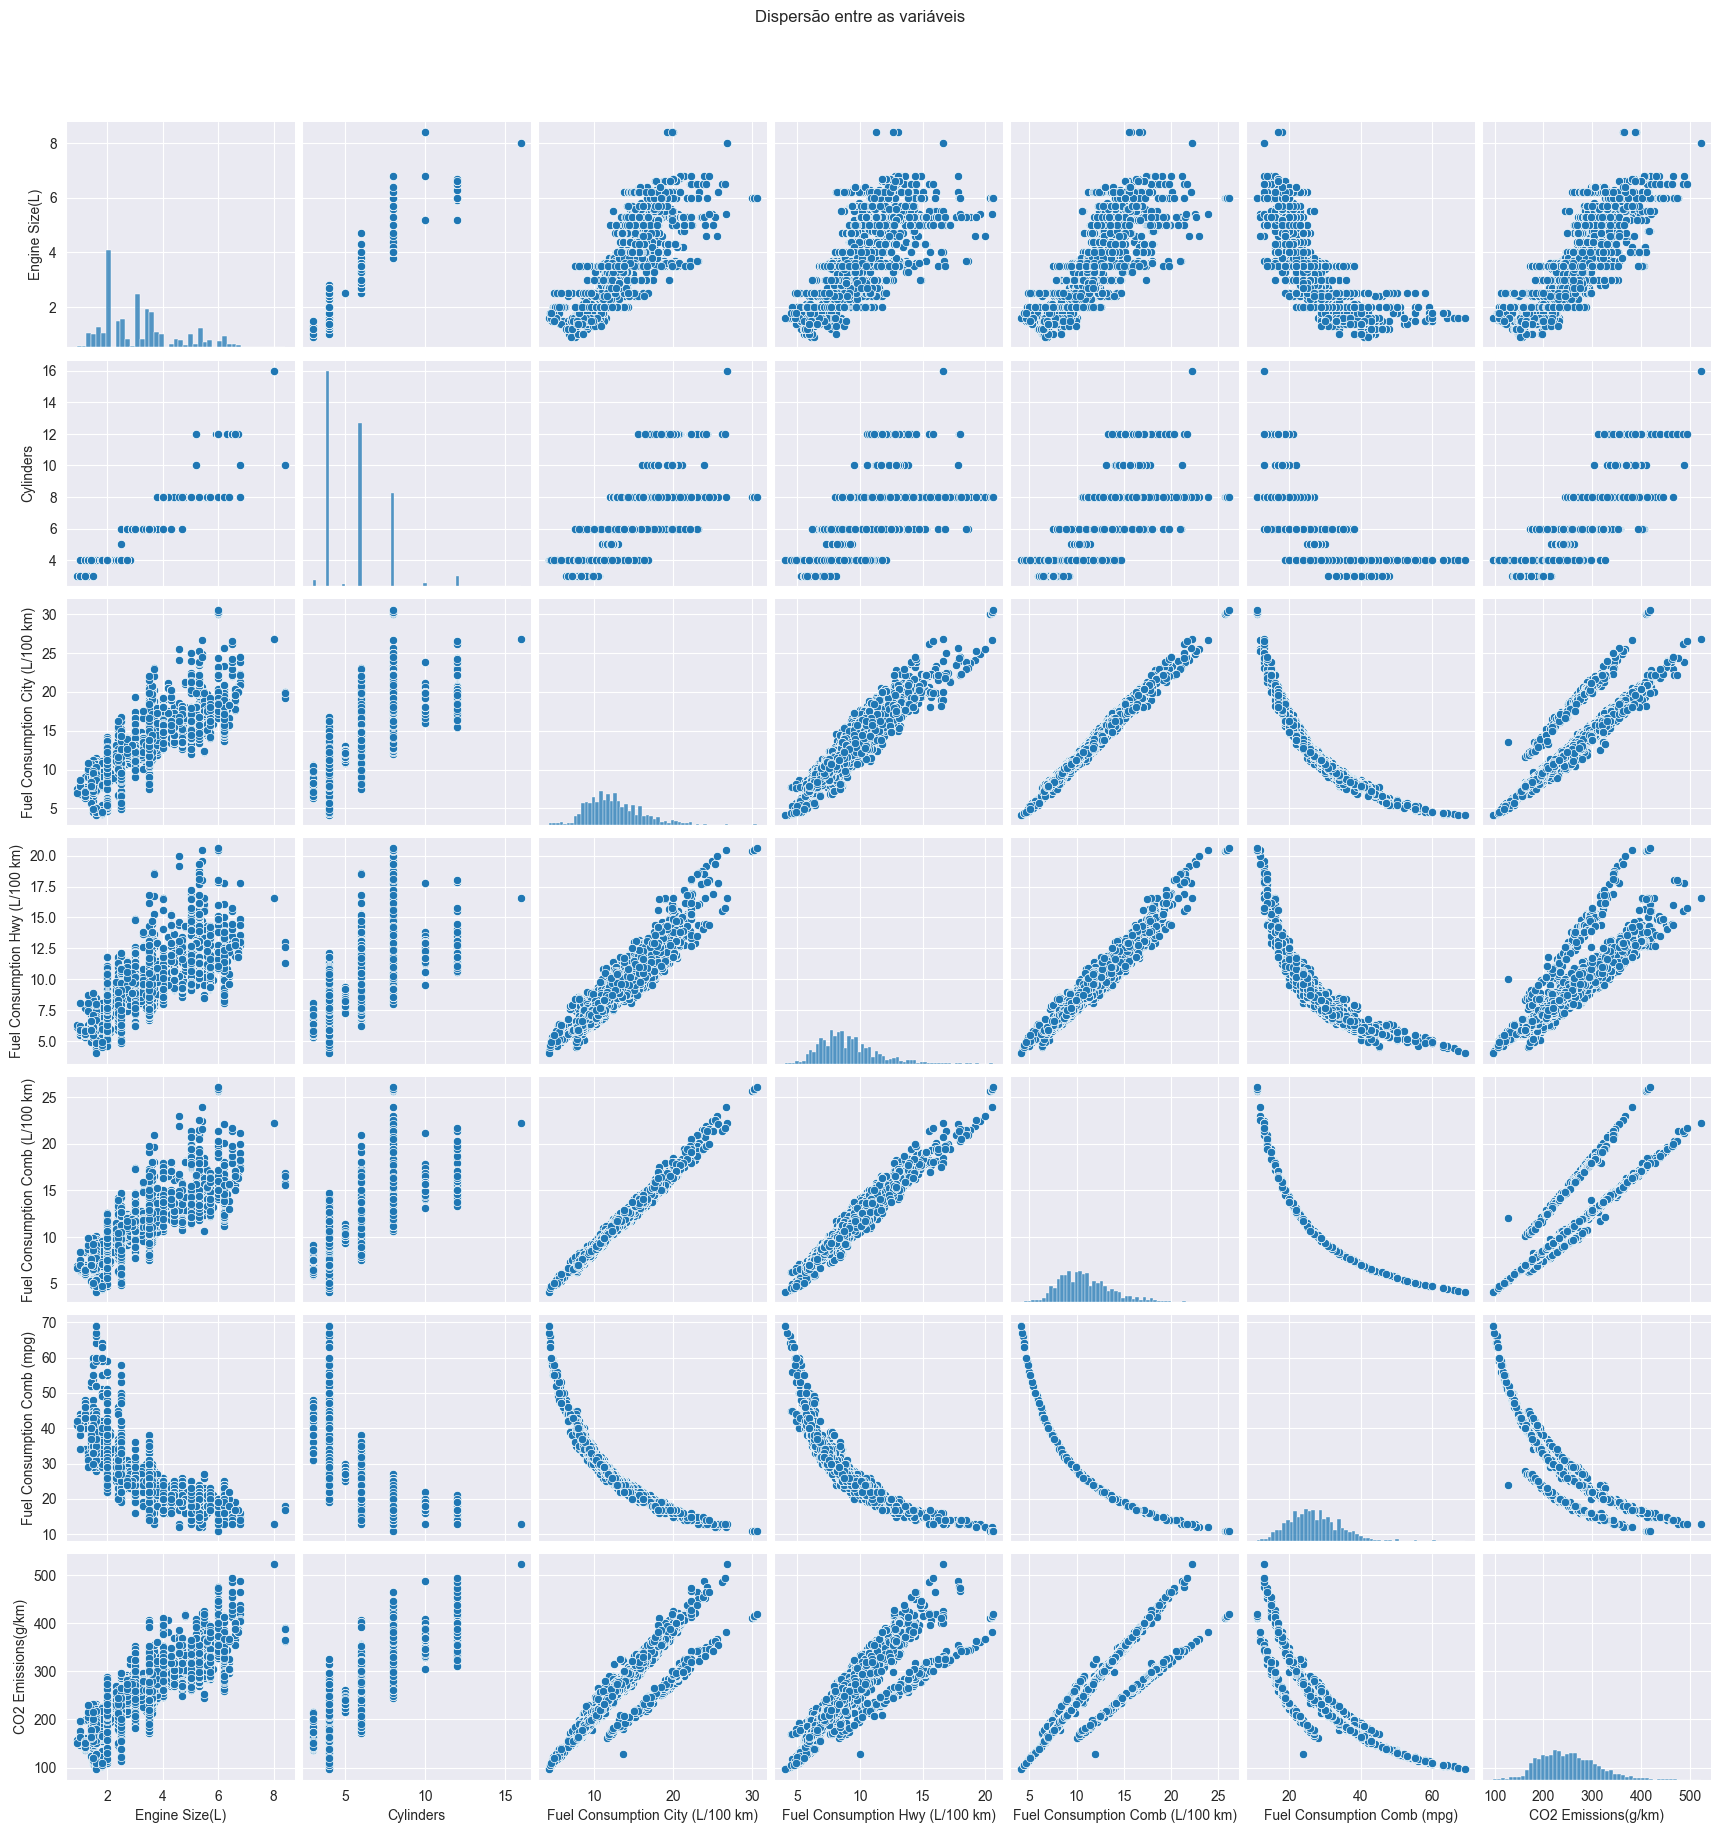

In [6]:
#Questão 4
# Visualizando a dispersão das variáveis em relação a emissão de CO2
#dica: use o pairplot para plotar todas de uma vez

disp = sns.pairplot(df)
disp.fig.suptitle('Dispersão entre as variáveis', y=1.05);

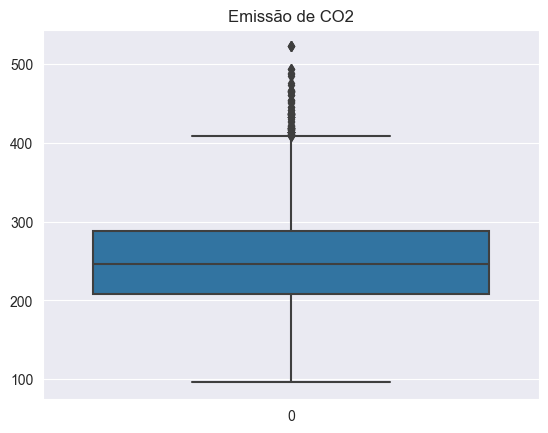

In [7]:
#Questão 5
#Visualizando a distribuição da emissão de CO2
#dica: que tal usar um boxplot aqui?
sns.boxplot(df['CO2 Emissions(g/km)'])
plt.title('Emissão de CO2');

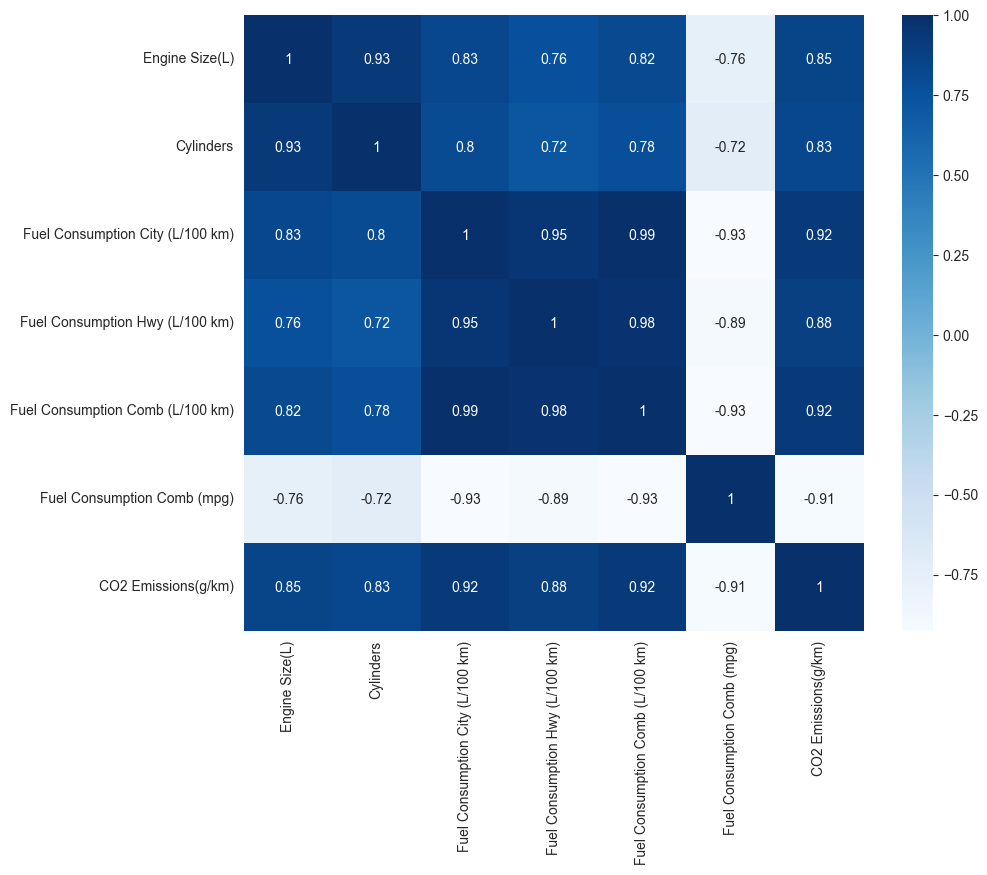

In [9]:
# Selecionando as colunas numéricas
numeric_columns = df.select_dtypes(exclude=['object'])

# Criando a matriz de correlação
correlation_matrix = numeric_columns.corr()

# Gerando o mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues');

In [ ]:
#Questão 7
#Transforme as variáveis categóricas em númericas usando o Pandas ou sckitlearn
#após a transformação, garanta que os novos valores estão no dataset (talvez você precise usar `copy` `concat` )
#não se esqueça de apagar as variáveis antigas `drop`
#você aqui pode querer rodar tudo duas vezes! Uma vez SEM as variáveis categóricas (apenas as remova do dataset) e a segunda vez transformando as variáveis categóricas
#qual versão irá se sair melhor? Porque você acha isso?

In [10]:
from sklearn.preprocessing import OneHotEncoder

In [11]:
# Armazenando as variáveis categóricas em uma variável
non_numeric_columns = df.select_dtypes(include=['object'])

# Criando o objeto OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Aplicando o OneHotEncoder
df_encoded = pd.DataFrame(encoder.fit_transform(non_numeric_columns))
print(df_encoded)

      0     1     2     3     4     5     6     7     8     9     ...  2133  \
0      1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1      1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2      1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   1.0   
3      1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4      1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
7380   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
7381   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
7382   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
7383   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
7384   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

      2134  2135  2136  2137  2138  2139  2140  214

In [12]:
df_encoded.columns = encoder.get_feature_names_out(non_numeric_columns.columns)
print(df_encoded)

      Make_ACURA  Make_ALFA ROMEO  Make_ASTON MARTIN  Make_AUDI  Make_BENTLEY  \
0            1.0              0.0                0.0        0.0           0.0   
1            1.0              0.0                0.0        0.0           0.0   
2            1.0              0.0                0.0        0.0           0.0   
3            1.0              0.0                0.0        0.0           0.0   
4            1.0              0.0                0.0        0.0           0.0   
...          ...              ...                ...        ...           ...   
7380         0.0              0.0                0.0        0.0           0.0   
7381         0.0              0.0                0.0        0.0           0.0   
7382         0.0              0.0                0.0        0.0           0.0   
7383         0.0              0.0                0.0        0.0           0.0   
7384         0.0              0.0                0.0        0.0           0.0   

      Make_BMW  Make_BUGATT

In [13]:
# Eliminando as colunas categóricas do dataframe original e concatenando os dataframes
df.drop(columns=non_numeric_columns.columns, inplace=True)
df = pd.concat([df, df_encoded], axis=1)
df.head()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Make_ACURA,Make_ALFA ROMEO,Make_ASTON MARTIN,...,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Fuel Type_D,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
0,2.0,4,9.9,6.7,8.5,33,196,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2.4,4,11.2,7.7,9.6,29,221,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.5,4,6.0,5.8,5.9,48,136,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3.5,6,12.7,9.1,11.1,25,255,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3.5,6,12.1,8.7,10.6,27,244,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
#Questão 8
#Defina X e y e separa 20% dos dados para test

In [15]:
from sklearn.model_selection import train_test_split

# Dividindo os dados de treino e teste
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Verificando
print("Dados de treino (shape):", train_df.shape)
print("Dados de teste (shape):", test_df.shape)

Dados de treino (shape): (5908, 2150)
Dados de teste (shape): (1477, 2150)


In [16]:
# Definindo X e y para o dataset de treino
X_train = train_df.drop(columns=['CO2 Emissions(g/km)'])
y_train = train_df['CO2 Emissions(g/km)']

# Attributing variables to X and y for the test set
X_test = test_df.drop(columns=['CO2 Emissions(g/km)'])
y_test = test_df['CO2 Emissions(g/km)']

In [ ]:
#Questão 9
#Antes de começarmos a treinar nossos modelos, que tal criar uma funcão que recebe 2 parâmetros: o valor previsto pelo modelo e o resultado real.
#Com base nesse 2 valores, a funcão calcula e imprime o R2, MSE e MAE

In [17]:
# Criando função
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def evaluate(y_pred, y_true):
    r2 = r2_score(y_pred, y_true)
    mse = mean_squared_error(y_pred, y_true)
    mae = mean_absolute_error(y_pred, y_true)
    print("R2:", r2)
    print("MSE:", mse)
    print("MAE:", mae)

In [35]:
#Quais variáveis tem mais importância pro nosso modelo?
#vamos usar o código abaixo para criar uma função que exiba as 10 variáveis que tem mais peso na predição do modelo
#Você consegue entender o que essa função está fazendo?
def feature_importance(modelo):
    importances = pd.Series(data=modelo.feature_importances_, index=df.drop(columns=['CO2 Emissions(g/km)']).columns)
    importances.sort_values(ascending=False, inplace=True) #ordenando as variáveis
    sns.barplot(x=importances[:10], y=importances.index[:10], orient='h').set_title('Importância de cada feature')


In [ ]:
#Escolha um modelo de regressão de sua preferência mais o Decision Tree, Random Forest e o XGBoost para treinar e testar.
#Para os 3 últimos (DT, RF e  XGB) calcule quais as features mais importantes usando a função que acabamos de criar
#Para cada um deles responda:
#1- Como foram as métricas de avaliação do modelo?
#2- Para os 3 últimos, responda: Quais features foram as mais importantes para o modelo?

In [19]:
#Questão 10 - Modelo 1 - Regressão Linear
from sklearn.linear_model import LinearRegression
LRmodel = LinearRegression()
LRmodel.fit(X_train, y_train)
LRpred = LRmodel.predict(X_test)

In [20]:
evaluate(LRpred, y_test)

R2: -0.000484637536372734
MSE: 1.1914934366951875e+20
MAE: 2033694720.1121488


### Nota
A Regressão Linear do Scikit Learn não possui o atributo 'feature_importances_'. Dessa forma, em vez de se utilizar a função 'feature_importance, criada acima, estou utilizando a função 'coef_' para obter os coeficientes das variáveis.

In [34]:
# Obtendo os coeficientes das variáveis
coefficients = LRmodel.coef_

# Criando um dataframe para associar os coeficientes às suas variáveis correspondentes
coef_df = pd.DataFrame({'Variável': df.drop(columns=['CO2 Emissions(g/km)']).columns,
                        'Coeficiente': coefficients})

# Ordenando por importância
coef_df = coef_df.sort_values(by='Coeficiente', ascending=False)

# Visualizando
print(coef_df)

                       Variável   Coeficiente
2144                Fuel Type_D  3.036149e+11
2148                Fuel Type_Z  3.036149e+11
2147                Fuel Type_X  3.036149e+11
2145                Fuel Type_E  3.036149e+11
42                   Make_SMART  1.800701e+11
...                         ...           ...
2111   Vehicle Class_SUBCOMPACT -2.460503e+11
2101      Vehicle Class_COMPACT -2.460503e+11
2103     Vehicle Class_MID-SIZE -2.460503e+11
2104  Vehicle Class_MINICOMPACT -2.460503e+11
2105      Vehicle Class_MINIVAN -2.642591e+11

[2149 rows x 2 columns]


In [ ]:
#Questão 11 - Modelo 2 - Decision Tree

In [22]:
from sklearn.tree import DecisionTreeRegressor
DTmodel = DecisionTreeRegressor()
DTmodel.fit(X_train, y_train)
DTpred = DTmodel.predict(X_test)

In [23]:
evaluate(DTpred, y_test)

R2: 0.9950213840367192
MSE: 17.055812081546676
MAE: 1.9041751297675469


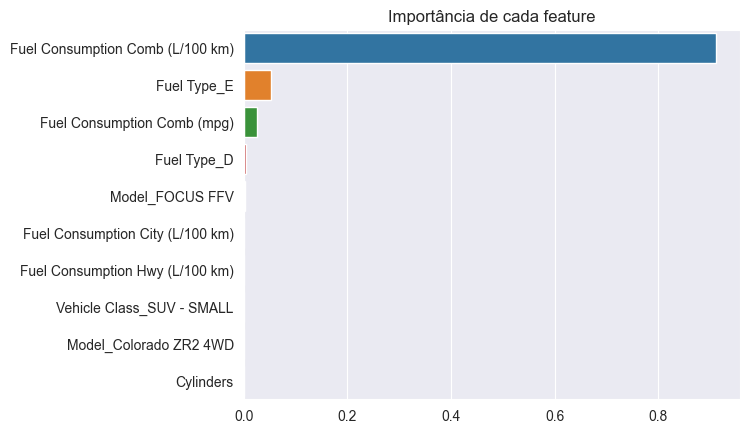

In [36]:
feature_importance(DTmodel)

In [ ]:
#Questão 12 - Modelo 3 - Random Forest

In [25]:
from sklearn.ensemble import RandomForestRegressor
RFmodel = RandomForestRegressor()
RFmodel.fit(X_train, y_train)
RFpred = RFmodel.predict(X_test)

In [26]:
evaluate(RFpred, y_test)

R2: 0.9964741031928088
MSE: 12.105051482781132
MAE: 1.8376195319763353


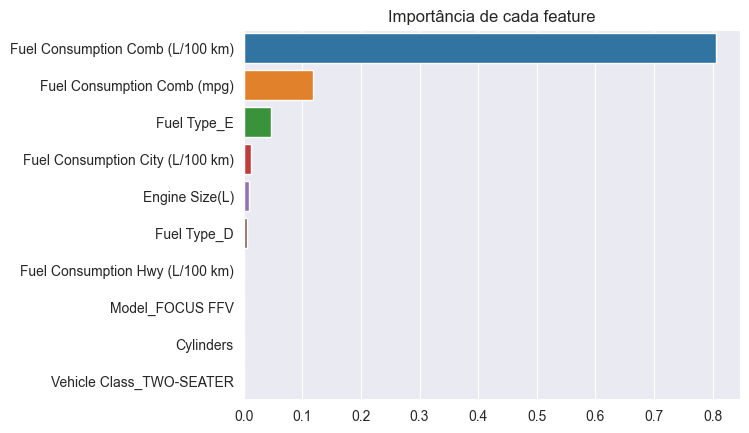

In [37]:
feature_importance(RFmodel)

In [ ]:
#Questão 13 - XGBoost

In [28]:
from xgboost import XGBRegressor
XGBmodel = XGBRegressor()
XGBmodel.fit(X_train, y_train)
XGBpred = XGBmodel.predict(X_test)

In [29]:
evaluate(XGBpred, y_test)

R2: 0.9949478314500968
MSE: 17.389921938684108
MAE: 2.3226477662372527


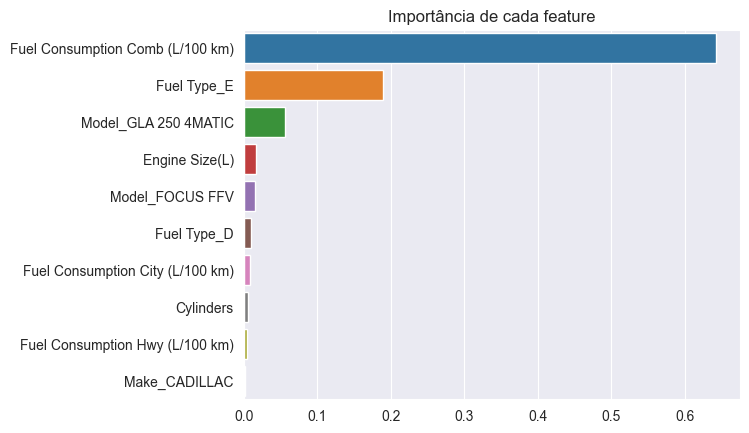

In [38]:
feature_importance(XGBmodel)

In [ ]:
#Questão 14
#Você consegue alterar os parâmetros do XGBoost para que ele alcance um resultado melhor?

In [39]:
XGBmodel_2 = XGBRegressor(learning_rate=0.1, n_estimators=1000 )
XGBmodel_2.fit(X_train, y_train)
XGBpred_2 = XGBmodel.predict(X_test)

In [40]:
evaluate(XGBpred_2, y_test)

R2: 0.9949478314500968
MSE: 17.389921938684108
MAE: 2.3226477662372527


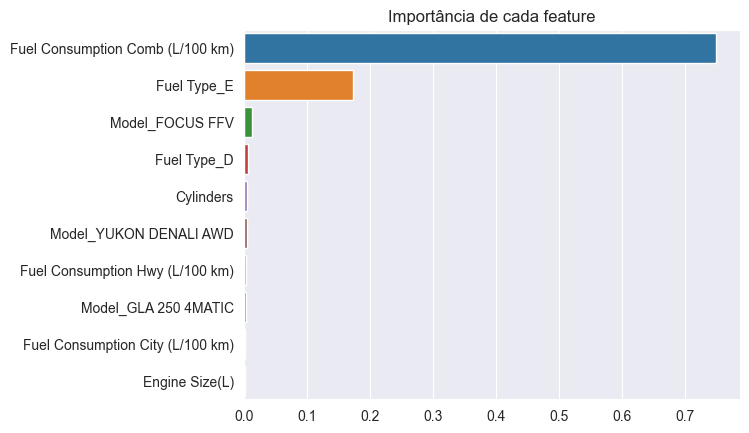

In [41]:
feature_importance(XGBmodel_2)

In [44]:
# Criando tabela comparativa das performances de todos os modelos, com as métricas em linhas e os modelos em colunas
def evaluation_table(y_pred, y_true):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    return r2, mse, mae

In [47]:
models = [LRmodel, DTmodel, RFmodel, XGBmodel, XGBmodel_2]
preds = [LRpred, DTpred, RFpred, XGBpred, XGBpred_2]
names = ['Regressão Linear', 'Decision Tree', 'Random Forest', 'XGBoost', 'XGBoost_2']

metrics = ['R2', 'MSE', 'MAE']
results = []

for i in range(len(models)):
    if preds[i] is not None and y_test is not None:
        r2, mse, mae = evaluation_table(preds[i], y_test)
        results.append([r2, mse, mae])
    else:
        results.append([None, None, None])

results_df = pd.DataFrame(results, columns=metrics, index=names)
print(results_df)

                        R2           MSE           MAE
Regressão Linear -0.000485  1.191493e+20  2.033695e+09
Decision Tree     0.995021  1.705581e+01  1.904175e+00
Random Forest     0.996474  1.210505e+01  1.837620e+00
XGBoost           0.994948  1.738992e+01  2.322648e+00
XGBoost_2         0.994948  1.738992e+01  2.322648e+00


## Conclusão
o modelo "Random Forest" obteve os melhores resultados, alcançando o maior valor de R2, (aprox 0,9965), o menor erro quadrático médio (MSE) (aprox 12,105) e o menor erro absoluto médio (MAE) aprox (1,838).

Esses resultados sugerem que o modelo "Random Forest" teve um desempenho melhor em termos de explicar a variação nos dados e fazer previsões precisas em comparação com os outros modelos listados.

Sobre o XGBoost, fiz uma tentativa de alteração dos hiperparâmetros, mas o modelo apresentou os mesmos resultados. Como já se trata de um otimizador e tendo em conta que os resultados obtidos com o RandomForest foram consideravelmente melhores que os demais, creio que o possível ganho marginal de performance do XGBoost não justifique o tempo de processamento necessário para a otimização adicional.